In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from matplotlib.patches import Patch

In [2]:
# load data
directory_path = "PSA_data"

file_pattern = "*1007.csv"

# Combine the directory path with the file pattern
files = glob.glob(os.path.join(directory_path, file_pattern))

# Read and concatenate the CSV files
dataframes = []

for file in files:
    df = pd.read_csv(file)
    dataframes.append(df)
    
df_all = pd.concat(dataframes, ignore_index=True)

# GN vs GNE
## Parameter Sensitivity Analysis

In [7]:
# prepare the dataframe
velocity_df = df_all[["network", "rel change", "velocity", "parameter", "condition 1", "condition 2"]]

# filter for parameters only relevant to the GN and GNE network
mask0 = velocity_df["parameter"].isin(["alphaGN", "alphaEO", "KaaNG", "KmiNG", "KmiEN", "KNEG", "KEG"])
df_GN_GNE = velocity_df[mask0]




In [18]:
# prepare figure
fontsize_legend = 15
fontsize_title_axis = 30


# Custom color palette
custom_palette = {'GN': 'red',
                  'GNE': 'green',
                  'GNEO1': 'blue',
                  'GNEO2':'orange'
                 }

# Costom legend (stripe, grey shade)
legend_elements = [Patch(facecolor="red", edgecolor="red", label="GN-F"),
                   Patch(facecolor="green", edgecolor="green", label="GNE-F"),
                   Patch(facecolor="blue", edgecolor="blue", label="GNEO 1"),
                   Patch(facecolor="orange", edgecolor="orange", label="GNEO 1"),
                   Patch(facecolor="gray", edgecolor="gray", label=r"non bi-stable"),
                   Patch(facecolor="white", edgecolor="gray", hatch="//",label=r"rel. change (SFP) > 20 %")
                  ]

# Costum figure titles
figure_titles = (r"$\alpha_G$, $\alpha_N$",
                 r"$\alpha_E$",
                 "$K_{GG}$, $K_{NN}$",
                 "$K_{GN}$, $K_{NG}$",
                 "$K_{EN}$, $K_{NE}$",
                 "$K_{NEG}$",
                 "$K_{EG}$"
                )

filename_savefig = ("alphaGN", "alphaEO", "KaaNG","KmiNG", "KmiEN", "KNEG", "KEG")


# ---- ensure title correspond the the correct data by ordering the dataframe after it.
# Convert 'parameter varied' column to a categorical type with the specified order
df_GN_GNE.loc[:,'parameter'] = pd.Categorical(df_GN_GNE['parameter'],
                                                   categories=filename_savefig,
                                                   ordered=True)

for param, title in zip(df_GN_GNE.sort_values("parameter")["parameter"].unique(), figure_titles):
    print("check the ordering", param, title)
    


check the ordering alphaGN $\alpha_G$, $\alpha_N$
check the ordering alphaEO $\alpha_E$
check the ordering KaaNG $K_{GG}$, $K_{NN}$
check the ordering KmiNG $K_{GN}$, $K_{NG}$
check the ordering KmiEN $K_{EN}$, $K_{NE}$
check the ordering KNEG $K_{NEG}$
check the ordering KEG $K_{EG}$


In [14]:
savefig=False
date="241007"
font_size=30
font_size_legend=15

In [9]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [19]:
np.linspace(-5, 5, 4)

array([-5.        , -1.66666667,  1.66666667,  5.        ])

In [21]:
# function not-bistable
def plot_not_bistable_disagree_with_reference_sfp(dataframe, dataframe_filtered, ax, plot_condition,
                                                  network_order = ["GN", "GNE", "GNEO1", "GNEO2"],
                                                  shift=0.3, box_width=0.2):
    """
    make sure that the dataframe contains the coloums:
    "network", "rel change", "velocity", "condition 1", "condition 2"
    
    make sure that "network" contains values "GN", "GNE", "GNEO1", "GNEO2"
    plot_condition = 1 : indicates non bistability
    plot_condition = 2 : indicates disagreement with reference SFPs.
    
    dataframe_filtered - mask regarding cond1 or cond2 and parameter
    dataframe - contains all data.
    """

    # order of networks
    dataframe.loc[:,"network"] = pd.Categorical(dataframe["network"],
                                                categories=network_order,
                                                ordered=True
                                               )
    network_sorted = dataframe.sort_values("network")["network"].unique()
    
    # position
    shifts = np.linspace(-shift, shift, len(network_order))
    
    # get y-limits
    ymax = np.max(dataframe["velocity"]) + 0.5
    ymin = np.min(dataframe["velocity"]) - 0.5
    
    if not dataframe_filtered.empty:
        
        # 1. nested for loop begin
        for network, shift in zip(network_sorted, shifts):
            
            # filter regarding networks
            mask1 = dataframe_filtered["network"]==network
            df_network = dataframe_filtered[mask1]
            
            # order of relative changes
            change_sorted = df_network.sort_values("rel change")["rel change"].unique().tolist()
            
            for factor in change_sorted:
                
                mask2 = df_network["rel change"]==factor
                df_factor = df_network[mask2]
                
                # get position of boxplot for the specific factor
                positions = change_sorted
                box_position = positions.index(factor) + shift
                
                if plot_condition == 1:
                    
                    # Shade the area behind the boxplot
                    ax.fill_betweenx([ymin ,ymax],
                                     box_position - box_width/2,
                                     box_position + box_width/2,
                                     color="gray", alpha=0.2)
                
                if plot_condition == 2:
                    
                    # Striped Shade the area behind the boxplot
                    ax.bar(box_position,
                           ymax - ymin,
                           width=box_width/2, 
                           bottom=ymin,
                           color='none',
                           edgecolor='gray',
                           hatch='//', linewidth=0, alpha=0.3)
            

In [16]:
#filter for condition 1 and condition 2
mask_cond1 = df_GN_GNE["condition 1"]!=True
mask_cond2 = df_GN_GNE["condition 2"]!=True

condition1_df = df_GN_GNE[mask_cond1]
condition2_df = df_GN_GNE[mask_cond2]

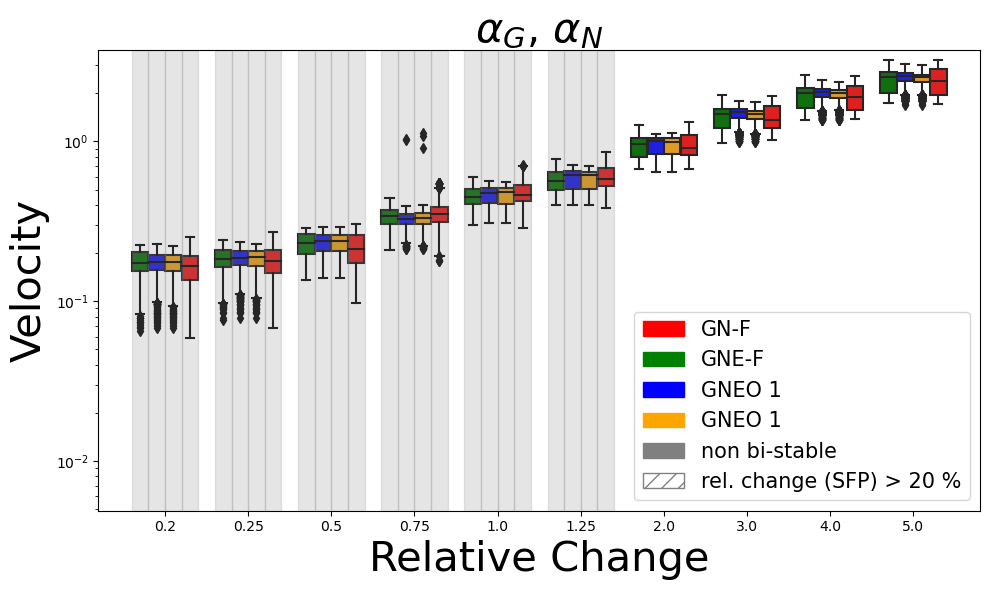

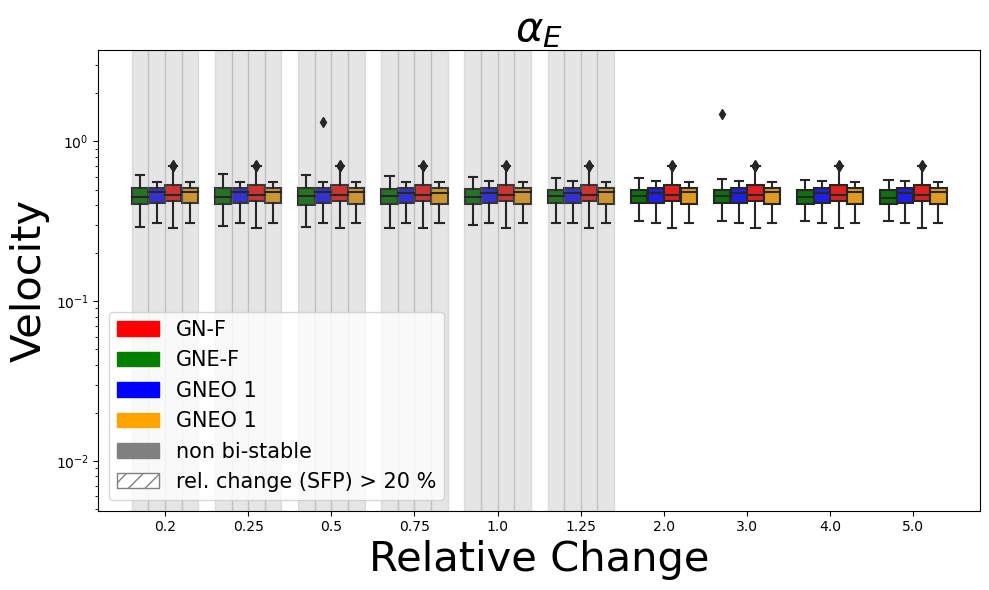

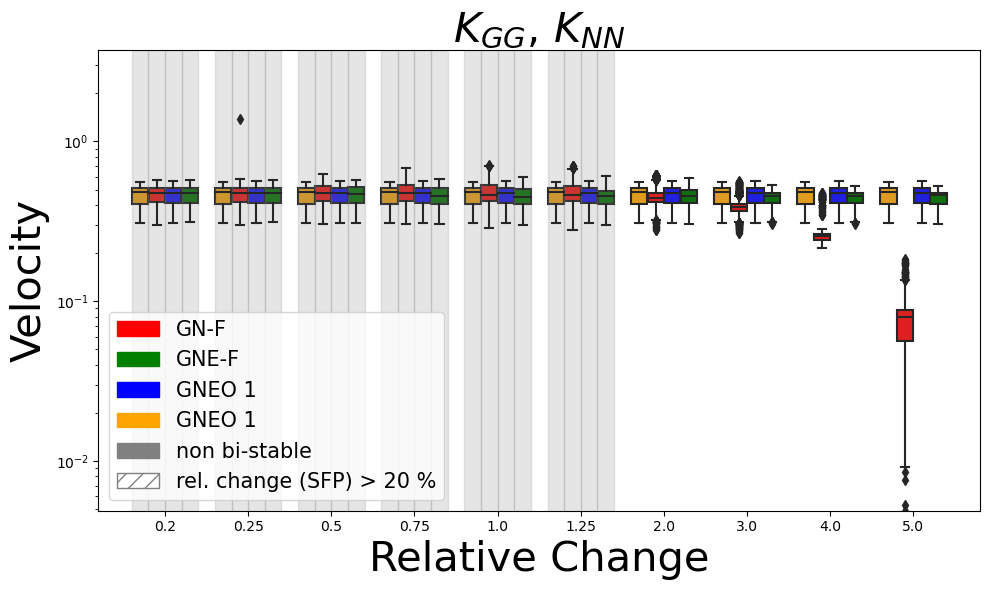

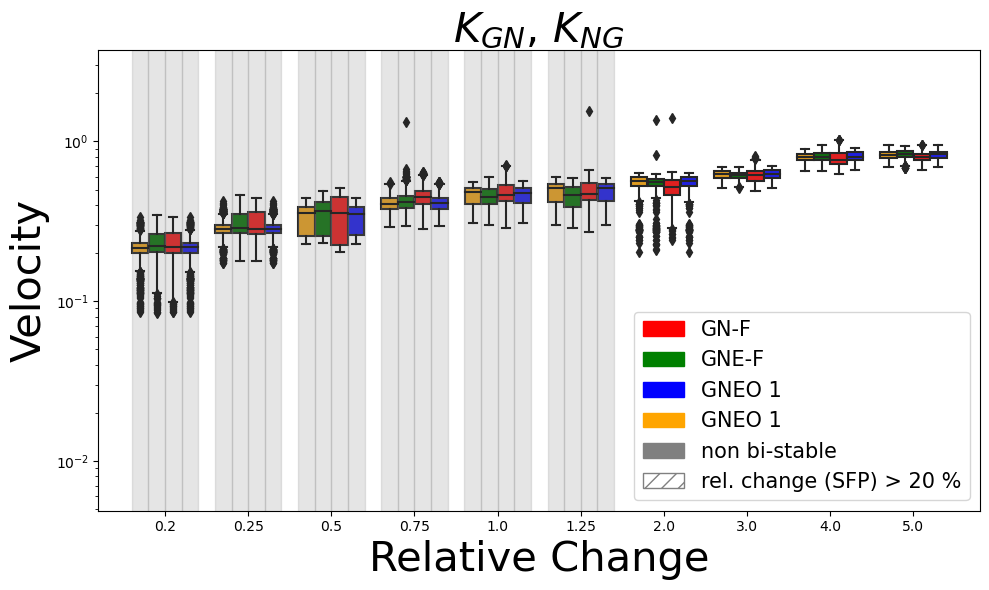

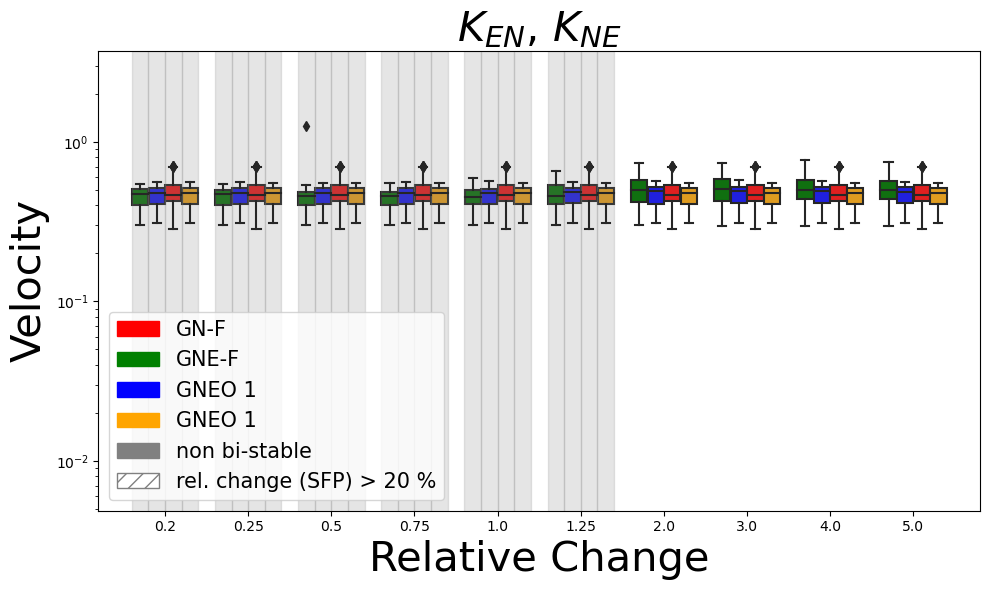

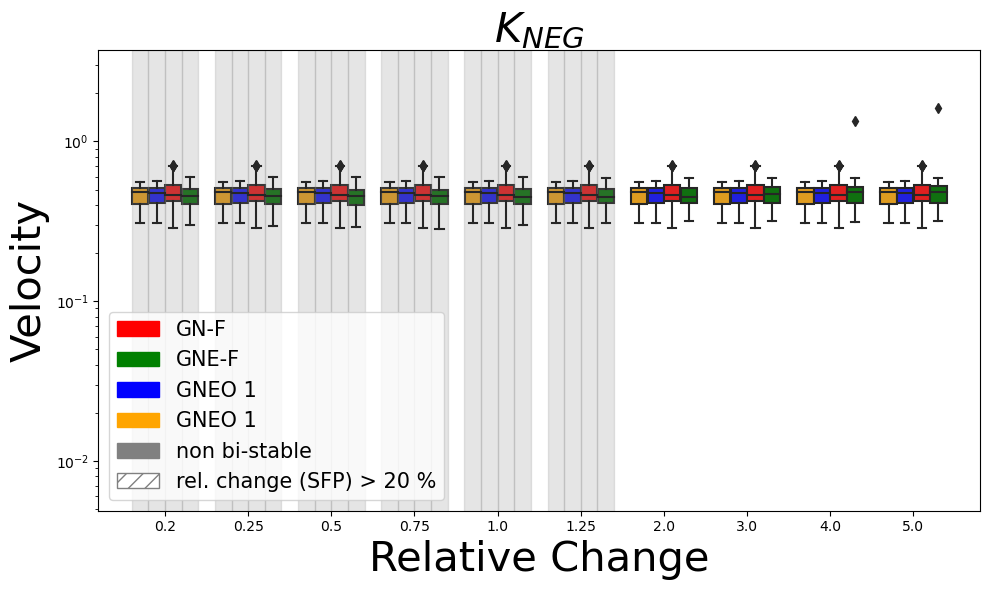

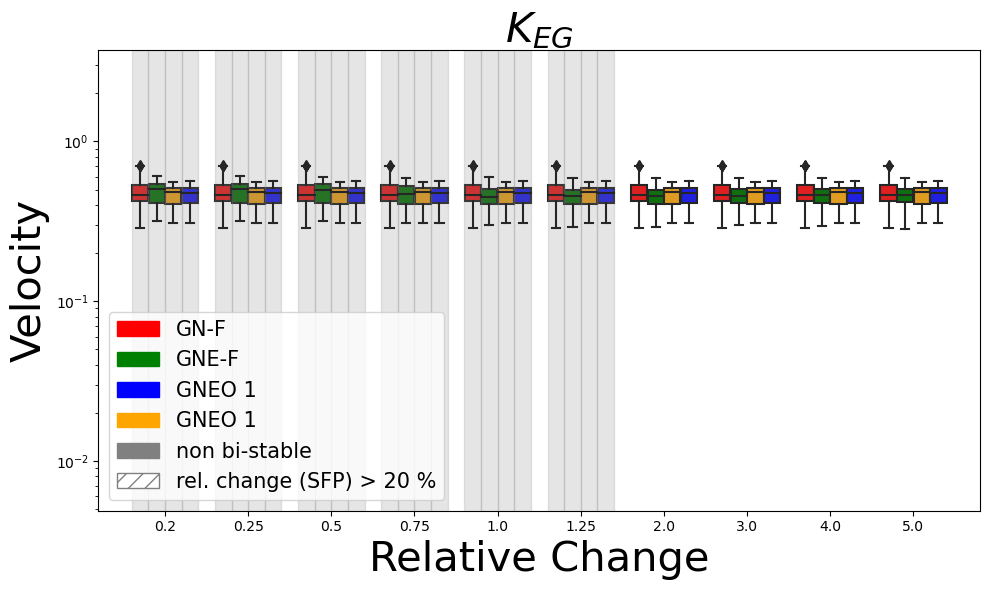

In [23]:
for parameter, filename, title in zip(df_GN_GNE.sort_values("parameter")["parameter"].unique(),
                                      filename_savefig,
                                      figure_titles
                                      
                           ):
    
    # 0. create new figure
    fig, ax = plt.subplots(figsize=(10,6))
    
    # 1. create grouped boxplot
    mask = df_GN_GNE["parameter"]==parameter  #filter for parameters
    df_GN_GNE_param=df_GN_GNE[mask]
    
    sns.boxplot(x="rel change",
                y="velocity",
                hue="network",
                data=df_GN_GNE_param,
                palette=custom_palette,
                ax=ax
               )
    
    

    # 2. indicate non bi-stability
    
    
    
    plot_not_bistable_disagree_with_reference_sfp(dataframe=df_GN_GNE,
                                                  dataframe_filtered=condition1_df,
                                                  ax=ax,
                                                  plot_condition=1
                                                 )
    
    # 3. indicate disagreement with reference Epi and PrE states
    
    # 4. title, axis labels, legends
    ax.set_title(f"{title}", fontsize=font_size)
    ax.set_xlabel("Relative Change", fontsize=font_size)
    ax.set_ylabel("Velocity", fontsize=font_size)
    ax.legend(handles=legend_elements, loc="best", fontsize=font_size_legend)
    
    # 5. adjust y-axis (ymin, ymax, logscale)
    ymax = np.max(velocity_df["velocity"]) + 0.5
    ymin = np.min(velocity_df["velocity"])
    
    if ymin < 0: # avoid trouble with logscale
        ymin=0
        
    ax.set_ylim(ymin, ymax)
    ax.set_yscale("log")
    
    # 6. adjust figure
    plt.tight_layout()
    
    # 7. save figures
    if savefig:
        plt.savefig(f"velocity_boxplots_{filename}_{date}.pdf", dpi=600)

In [ ]:


# Example data
data = {
    'Category': np.random.choice(['A', 'B', 'C'], size=100),
    'Values': np.random.randn(100)
}
df = pd.DataFrame(data)

# Create the violin plot
sns.violinplot(x='Category', y='Values', data=df)

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data
data = {
    'Category': np.random.choice(['A', 'B', 'C'], size=100),
    'Values': np.random.randn(100)
}
df = pd.DataFrame(data)

# Create the boxplot
sns.boxplot(x='Category', y='Values', data=df)

# Show the plot
plt.show()
